In [2]:
import gymnasium as gym
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt

In [5]:
# Define the environment
env = gym.make('Ant-v4')
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run

# Define the RL algorithms
algos = {
    'A2C': A2C('MlpPolicy', env, verbose=1),
    'DDPG': DDPG('MlpPolicy', env, verbose=1),
    'PPO': PPO('MlpPolicy', env, verbose=1),
    'SAC': SAC('MlpPolicy', env, verbose=1),
    'TD3': TD3('MlpPolicy', env, verbose=1)
}

# Train the algorithms and evaluate their performance
rewards = {}
for name, algo in algos.items():
    print(f'Training {name}...')
    algo.learn(total_timesteps=100000)
    
    print(f'Evaluating {name}...')
    mean_reward, std_reward = evaluate_policy(algo, env, n_eval_episodes=10)
    rewards[name] = (mean_reward, std_reward)

Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Training A2C...
------------------------------------
| time/                 |          |
|    fps                | 1390     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -11.3    |
|    explained_variance | -2.34    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -33.6    |
|    std                | 0.999    |
|    value_loss         | 15.9     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1415     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -11.3    |
|    explained_variance | 0.538    |
|    learni

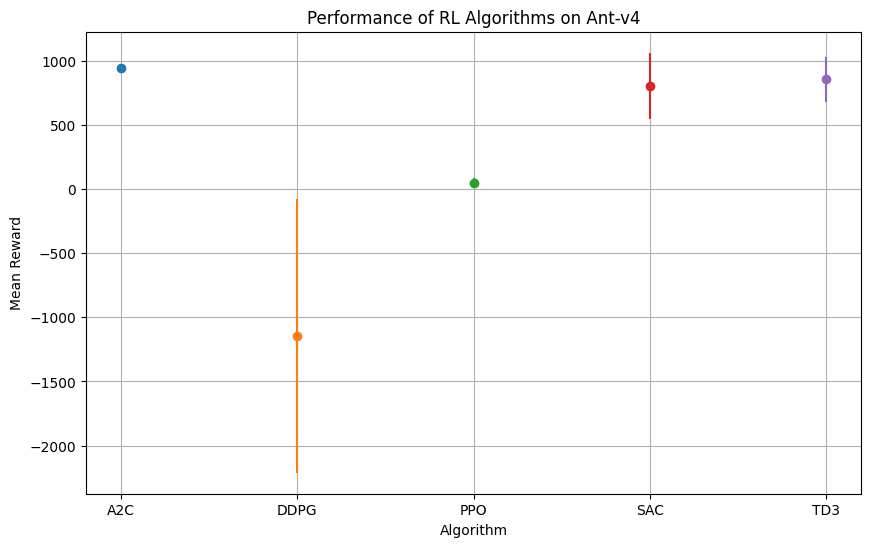

In [6]:
# Plot the results
plt.figure(figsize=(10, 6))
for name, (mean_reward, std_reward) in rewards.items():
    plt.errorbar(name, mean_reward, yerr=std_reward, fmt='o')

plt.title('Performance of RL Algorithms on Ant-v4')
plt.xlabel('Algorithm')
plt.ylabel('Mean Reward')
plt.grid(True)
plt.savefig('rl_algorithms_performance.svg', format='svg')
plt.show()